## k-Nearest-Neighbor Classifier with sklearn

### Introduction

<img width="90%"  src="../images/sklearn_text_with_animals_nearest_neighbor.webp" srcset="../images/sklearn_text_with_animals_nearest_neighbor_800w.webp 800w,../images/sklearn_text_with_animals_nearest_neighbor_700w.webp 700w,../images/sklearn_text_with_animals_nearest_neighbor_600w.webp 600w,../images/sklearn_text_with_animals_nearest_neighbor_500w.webp 500w,../images/sklearn_text_with_animals_nearest_neighbor_400w.webp 400w,../images/sklearn_text_with_animals_nearest_neighbor_350w.webp 350w,../images/sklearn_text_with_animals_nearest_neighbor_300w.webp 300w" alt="sklearn text with  animals" />

The underlying concepts of the K-Nearest-Neighbor classifier (kNN) can be found in the chapter [k-Nearest-Neighbor Classifier](k_nearest_neighbor_classifier.php) of our Machine Learning Tutorial. In this chapter we also showed simple functions written in Python to demonstrate the fundamental principals.

Instead of using these functions, even though they showed impressive results, we recommend to use the functionalities of the `sklearn` module. We used `sklearn`  already in our previous chapters.

### Using sklearn for kNN

*neighbors* is a package of the *sklearn* module, which provides functionalities for nearest neighbor classifiers both for unsupervised and supervised learning.

The classes in sklearn.neighbors can handle both Numpy arrays and scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.


*scikit-learn* implements two different nearest neighbors classifiers: 

<dl>
  <dt>KNeighborsClassifier</dt>
  <dd>is based on the k nearest neighbors of a sample, which has to be classified. The number 'k' is an integer value specified by the user. This is the most frequently used classifiers of both algorithms.</dd>

  <dt>RadiusNeighborsClassifier</dt>
  <dd>is based on the number of neighbors within a fixed radius r for each sample which has to be classified. 'r' is float value specified by the user. This classifier is less often used.</dd>
</dl>




#### KNeighborsClassifier

We will artificially create a dataset with three classes to test the k-nearest neighbor classifier 'KNeighborsClassifier' from 'sklearn.neighbors'. We described this in our chapter [Data Set Creation for Machine Learning](data_set_creation.php)

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [1, 8]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)


Let us visualize what we have created:

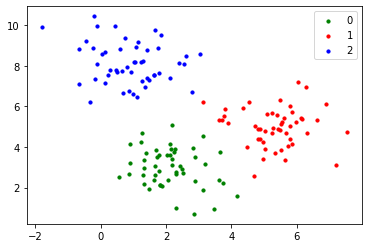

In [2]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

We have to split now the data in a test and train set. 

In [3]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)

train_data, test_data, train_labels, test_labels = res 

We are ready now to perform the classification with the `kNeighborsClassifier`:

In [4]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(test_labels)


Predictions from the classifier:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]
Target values:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]


To evaluate the result, we will use `accuracy_score` from the module `sklearn.metrics`. To see how `accuracy_score` works, we will use a simple example with pseudo predictions and labels:

In [5]:
from sklearn.metrics import accuracy_score
example_predictions = [0, 2, 1, 3, 2, 0, 1]
example_labels      = [0, 1, 2, 3, 2, 1, 1]
print(accuracy_score(example_predictions, example_labels))

0.5714285714285714


The return value corresponds to the quotient of correctly classified and the total number of predictions.
If you are only interested in the number of correctly classified items, you can set the parameter `normalize` to `False`. The default value is `True`.

In [6]:
print(accuracy_score(example_predictions, 
                     example_labels,
                     normalize=False))

4


Now we are ready to evaluate the results of our previous clissification example:

In [7]:
print(accuracy_score(predicted, test_labels))

1.0


You may have noticed that we instantiated the k-nearest neighbor classifier in our previous example by calling it without any arguments, i.e. `KNeighborsClassifier()`.
In the following, we instantiate it with some possible keyword parameters:

In [8]:
knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=30, 
                           metric='minkowski',
                           metric_params=None, 
                           n_jobs=1, 
                           n_neighbors=5, 
                           p=2,
                           weights='uniform')

The parameter metric is  Minkowski by default. We explained the Minkowski distance in our chapter [k-Nearest-Neighbor Classifier](k_nearest_neighbor_classifier.php). The parameter `p` is the `p` of the Minkowski formula: When p is set to 1, this is equivalent to using the manhattan_distance, and the euclidean_distance will be used if p is assigned the value 2. 

The parameter 'algorithm` determines which algorithm will be used, i.e.
- `ball_tree` will use BallTree
- `kd_tree` will use KDTree
- `brute` will use a brute-force search.
We set the parameter to `auto` which will attempt to decide the most appropriate algorithm based on the values passed to the fit method.

The parameter `leaf_size` is needed by `BallTree` or `KDTree`. It can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.


### Using the Iris Data

In the following example we will use the Iris data set:

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
data, labels = iris.data, iris.target

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 


In [10]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 


print("Predictions from the classifier:")
test_data_predicted = knn.predict(test_data)
print(test_data_predicted)
print("Target values:")
print(test_labels)

Predictions from the classifier:
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
Target values:
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]


In [11]:
print(accuracy_score(test_data_predicted, test_labels))

1.0


In [12]:
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

Predictions from the classifier:
[1 2 1 2 2 0 1 0 1 2 2 0 1 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0
 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0 0 2 0 2 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1
 1 0 1 0 0 2 2 2 0 0 2 0 2 0 2 1 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0
 2 1 2 1 2 2 2 2 0]
Target values:
[1 2 1 2 2 0 1 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0
 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1
 1 0 1 0 0 2 2 2 0 0 1 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0
 2 1 2 1 2 2 1 2 0]
0.9583333333333334


In [13]:
knn2 = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=5, 
                            p=2,         # p=2 is equivalent to euclidian distance
                            weights='uniform')

knn.fit(train_data, train_labels) 
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

1.0

#### RadiusNeighborsClassifier

The way of working of the k nearest neighbor classifier consists in increasing a circle around the unknown (i.e. the item which needs to be classified) sample until the circle contains exactly k items. The Radius Neighbors Classifier has a fixed length for the surrounding circle. It locates all items in the training dataset that are within the circle with the given radius length around the item, which has to be classified. As a consequence of the fixed radius approach dense regions of the feature distribution will provide more information and sparse regions will contribute less information.

In [14]:
from sklearn.neighbors import RadiusNeighborsClassifier

X = [[0, 1], [0.5, 1], [3, 1], [3, 2], [1.3, 0.8], [2.5, 2.5]]
y = [0, 0, 1, 1, 0, 1]

neigh = RadiusNeighborsClassifier(radius=1.0)
neigh.fit(X, y)

print(neigh.predict([[1.5, 1.2]]))

print(neigh.predict([[3.1, 2.1]]))


[0]
[1]


In [15]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [7, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=155, 
                          centers=np.array(centers),
                          cluster_std = 1.3,
                          random_state=1)


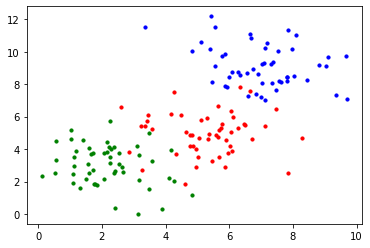

In [16]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))


In [17]:
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 

In [18]:
rnn = RadiusNeighborsClassifier(radius=1)
rnn.fit(train_data, train_labels)


RadiusNeighborsClassifier(radius=1)

In [19]:
predicted = rnn.predict(test_data)

In [20]:
print(accuracy_score(predicted, test_labels))

0.9354838709677419


A good value for `k` is the square root of all the samples in the training set:

In [21]:
k = int(len(labels) ** 0.5)
# make this value odd:
if k % 2 == 0:
    k += 1
k

13

Let us compare this with a k nearest neighbor classifier:

In [22]:
knn = KNeighborsClassifier()
knn.fit(data, labels) 
KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=k, # default is 5
                     p=2,         # p=2 is equivalent to euclidian distance
                     weights='uniform')


KNeighborsClassifier(n_jobs=1, n_neighbors=13)

In [23]:
predicted = knn.predict(test_data)
print(accuracy_score(predicted, test_labels))

0.9354838709677419


In [24]:
from sklearn.metrics import confusion_matrix 
# Evaluate Model
cm = confusion_matrix(predicted, test_labels)
print(cm) 

[[10  0  0]
 [ 0  6  0]
 [ 0  2 13]]


### Exercises

#### Exercise 1

Classify the data in ["strange_flowers.txt"](data/strange_flowers.txt) with a k nearest neighbor classifier.

### Solutions

#### Solution to Exercise 1


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # necessary to reduce biases of large numbers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 

dataset = pd.read_csv("data/strange_flowers.txt", 
                      header=None, 
                      names=["red", "green", "blue", "size", "label"],
                      sep=" ")
dataset

,red,green,blue,size,label
0,238.0,104.0,8.0,3.65,1.0
1,235.0,114.0,9.0,4.00,1.0
2,252.0,93.0,9.0,3.71,1.0
3,242.0,116.0,9.0,3.67,1.0
4,251.0,117.0,15.0,3.49,1.0
...,...,...,...,...,...
790,0.0,248.0,98.0,3.03,4.0
791,0.0,253.0,106.0,2.85,4.0
792,0.0,250.0,91.0,3.39,4.0
793,0.0,248.0,99.0,3.10,4.0


In [26]:
data = dataset.drop('label', axis=1)
labels = dataset.label

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    random_state=0, 
                                                    test_size=0.2) 


In [28]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) #  transform
X_test = scaler.transform(X_test) #  transform

We set k to the square root of size of the learn set:

In [29]:
k = int(len(X_train) ** 0.5)
k

25

In [30]:
# Define the model
classifier = KNeighborsClassifier(n_neighbors=k, 
                                  p=2,    # Euclidian
                                  metric="minkowski") #  p for different label types

In [31]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array([3., 1., 3., 4., 3., 3., 1., 4., 3., 3., 4., 1., 3., 1., 2., 2., 2.,
       3., 1., 4., 2., 3., 4., 1., 3., 3., 4., 4., 1., 2., 1., 1., 2., 3.,
       1., 3., 3., 2., 2., 2., 3., 3., 4., 1., 4., 2., 3., 2., 3., 2., 2.,
       3., 1., 3., 4., 1., 2., 4., 2., 3., 3., 4., 3., 4., 3., 1., 2., 2.,
       1., 3., 3., 1., 4., 2., 2., 3., 2., 4., 2., 4., 1., 3., 4., 2., 4.,
       3., 2., 2., 2., 3., 2., 2., 3., 3., 1., 4., 2., 1., 2., 2., 1., 2.,
       4., 3., 3., 3., 2., 1., 2., 4., 2., 3., 3., 1., 2., 4., 3., 1., 1.,
       2., 1., 4., 3., 4., 2., 2., 3., 2., 4., 1., 4., 2., 4., 4., 4., 4.,
       4., 2., 4., 4., 4., 2., 3., 2., 1., 1., 2., 3., 1., 1., 3., 1., 2.,
       4., 2., 4., 2., 3., 1.])

In [33]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print(cm) 


[[31  1  0  0]
 [ 1 46  0  0]
 [ 0  0 44  0]
 [ 0  0  0 36]]


In [34]:
print(accuracy_score(y_test, y_pred))

0.9874213836477987
